<a href="https://colab.research.google.com/github/haeeeeuni/Deeplearning_assignments/blob/main/Deeplearning_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep learning Assignment 2


**실습 과제2: CNN & Transfer Learning - 실습보고서 작성**

- 각 실습 과제의 목표 및 목적
- 실습 과제의 진행 과정 구체적인 숫자 포함
- 실습 과제 결과
- 생각해볼 점, 논의할 점, 이외에 본인이 기록하고 싶은 모든 것 가능
- 전체적으로 필요시 학습 속도 (Learning Curve)와 모델의 Training 및 Inference 시간, 파라미터의 수를 비교하세요.



# **실습 과제 1.**

Lab 3 CNN MNIST 실습에서 Dropout 을 추가하기 전과 후의 모델을 각각 학습시키고 결과를 논의하세요.


# CNN MNIST with Dropout

/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:1347: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Epoch 1, Batch 200, Loss: 0.523, Accuracy: 83.41%
Epoch 1, Batch 400, Loss: 0.184, Accuracy: 94.62%
Epoch 1, Batch 600, Loss: 0.136, Accuracy: 95.78%
Epoch 1, Batch 800, Loss: 0.131, Accuracy: 96.24%
Epoch 2, Batch 200, Loss: 0.099, Accuracy: 96.88%
Epoch 2, Batch 400, Loss: 0.095, Accuracy: 97.11%
Epoch 2, Batch 600, Loss: 0.093, Accuracy: 97.20%
Epoch 2, Batch 800, Loss: 0.099, Accuracy: 97.32%
Epoch 3, Batch 200, Loss: 0.072, Accuracy: 97.69%
Epoch 3, Batch 400, Loss: 0.074, Accuracy: 97.92%
Epoch 3, Batch 600, Loss: 0.077, Accuracy: 97.65%
Epoch 3, Batch 800, Loss: 0.069, Accuracy: 97.87%
Epoch 4, Batch 200, Loss: 0.067, Accuracy: 97.96%
Epoch 4, Batch 400, Loss: 0.059, Accuracy: 98.23%
Epoch 4, Batch 600, Loss: 0.065, Accuracy: 97.99%
Epoch 4, Batch 800, Loss: 0.067, Accuracy: 98.02%
Epoch 5, Batch 200, Loss: 0.055, Accuracy: 98.28%
Epoch 5, Batch 400, Loss: 0.053, Accuracy: 98.35%
Epoch 5, Batch 600, Loss: 0.049, Accuracy: 98.44%
Epoch 5, Batch 800, Loss: 0.052, Accuracy: 98.34%


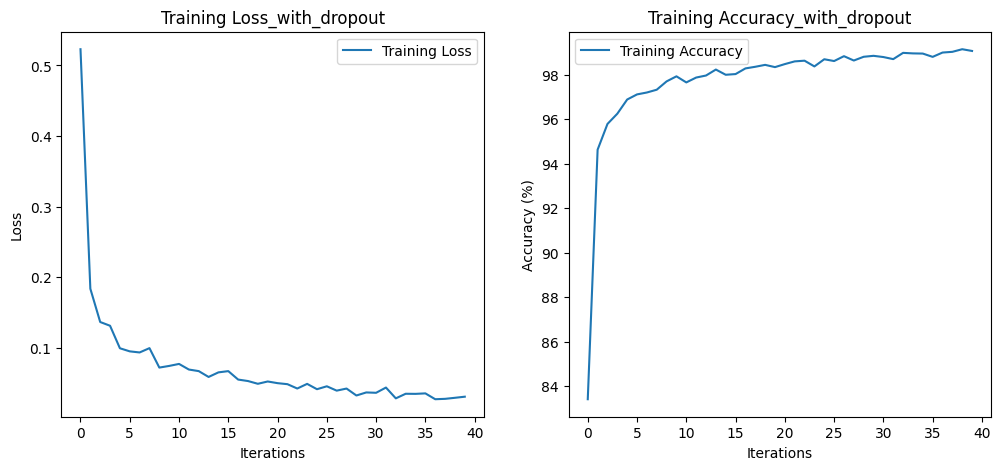

In [ ]:
#CNN MNIST with dropout - net_with_dropout

import torch
import torchvision
import torchvision.transforms as transforms
from torch import nn, optim
from torch.utils.data import DataLoader
import time


# Step 1: Define the transformations and load the MNIST dataset
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                      download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                     download=True, transform=transform)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

# Step 2: Define the CNN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout2d(0.25)
        self.dropout2 = nn.Dropout2d(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = nn.functional.relu(x)
        x = self.conv2(x)
        x = nn.functional.relu(x)
        x = nn.functional.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = nn.functional.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = nn.functional.log_softmax(x, dim=1)
        return output

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net_with_dropout = Net().to(device)
#net_with_dropout = Net()


# Step 3: Define a Loss function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net_with_dropout.parameters(), lr=0.001)
total = 0
correct = 0

# Step 4: Train the Network
start_time_with_dropout = time.time()
train_losses = []
train_accuracy = []

for epoch in range(10):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        #inputs, labels = data
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = net_with_dropout(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        if i % 200 == 199:  # print every 200 mini-batches
            avg_loss = running_loss / 200
            accuracy = 100 * correct / total
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 200:.3f}, Accuracy: {accuracy:.2f}%')
            train_losses.append(avg_loss)
            train_accuracy.append(accuracy)
            running_loss = 0.0
            correct = 0
            total = 0
end_time_with_dropout = time.time()
print('Finished Training')
learning_time_with_dropout = end_time_with_dropout - start_time_with_dropout
print("Learning time with dropout:", learning_time_with_dropout, "seconds")


# Step 5: Test the network on the test data
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        # images, labels = data
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net_with_dropout(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10,000 test images: {100 * correct / total}%')

# Step 7: Plot the learning curves for accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.title('Training Loss_with_dropout')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.title('Training Accuracy_with_dropout')
plt.xlabel('Iterations')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.show()

In [ ]:
# prompt: count the total number of learnable parameters

total_params = sum(p.numel() for p in net_with_dropout.parameters())
print(f"Total Parameters: {total_params/1000} k")

# prompt: save the model with the name including dropout
torch.save(net_with_dropout.state_dict(), 'minst_net_with_dropout.pt')

Total Parameters: 1199.882 k


# CNN MNIST without Dropout

-dropout은 모델의 overfitting을 방지하기 위한 전략

Epoch 1, Batch 200, Loss: 0.384, Accuracy: 88.43%
Epoch 1, Batch 400, Loss: 0.100, Accuracy: 96.96%
Epoch 1, Batch 600, Loss: 0.076, Accuracy: 97.68%
Epoch 1, Batch 800, Loss: 0.059, Accuracy: 98.18%
Epoch 2, Batch 200, Loss: 0.043, Accuracy: 98.60%
Epoch 2, Batch 400, Loss: 0.042, Accuracy: 98.59%
Epoch 2, Batch 600, Loss: 0.040, Accuracy: 98.85%
Epoch 2, Batch 800, Loss: 0.043, Accuracy: 98.61%
Epoch 3, Batch 200, Loss: 0.025, Accuracy: 99.16%
Epoch 3, Batch 400, Loss: 0.026, Accuracy: 99.12%
Epoch 3, Batch 600, Loss: 0.025, Accuracy: 99.20%
Epoch 3, Batch 800, Loss: 0.029, Accuracy: 99.12%
Epoch 4, Batch 200, Loss: 0.012, Accuracy: 99.45%
Epoch 4, Batch 400, Loss: 0.018, Accuracy: 99.41%
Epoch 4, Batch 600, Loss: 0.019, Accuracy: 99.29%
Epoch 4, Batch 800, Loss: 0.019, Accuracy: 99.48%
Epoch 5, Batch 200, Loss: 0.013, Accuracy: 99.53%
Epoch 5, Batch 400, Loss: 0.013, Accuracy: 99.62%
Epoch 5, Batch 600, Loss: 0.014, Accuracy: 99.41%
Epoch 5, Batch 800, Loss: 0.015, Accuracy: 99.47%


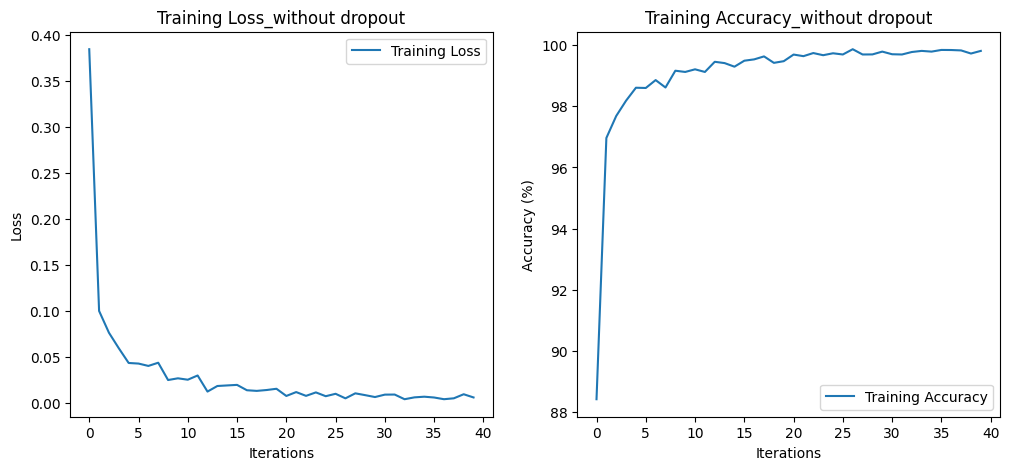

In [ ]:
#CNN MNIST without dropout - net_without_dropout

import torch
import torchvision
import torchvision.transforms as transforms
from torch import nn, optim
from torch.utils.data import DataLoader
import time


# Step 1: Define the transformations and load the MNIST dataset
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                      download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                     download=True, transform=transform)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

# Step 2: Define the CNN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        #remove dropout
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = nn.functional.relu(x)
        x = self.conv2(x)
        x = nn.functional.relu(x)
        x = nn.functional.max_pool2d(x, 2)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = nn.functional.relu(x)
        x = self.fc2(x)
        output = nn.functional.log_softmax(x, dim=1)
        return output

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net_without_dropout = Net().to(device)
#net_without_dropout = Net()


# Step 3: Define a Loss function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net_without_dropout.parameters(), lr=0.001)
total = 0
correct = 0

# Step 4: Train the Network
start_time_without_dropout = time.time()
train_losses = []
train_accuracy = []

for epoch in range(10):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        #inputs, labels = data
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = net_without_dropout(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        if i % 200 == 199:  # print every 200 mini-batches
            avg_loss = running_loss / 200
            accuracy = 100 * correct / total
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 200:.3f}, Accuracy: {accuracy:.2f}%')
            train_losses.append(avg_loss)
            train_accuracy.append(accuracy)
            running_loss = 0.0
            correct = 0
            total = 0
end_time_without_dropout = time.time()
print('Finished Training')
learning_time_without_dropout = end_time_without_dropout - start_time_without_dropout
print("Learning time without dropout:", learning_time_without_dropout, "seconds")


# Step 5: Test the network on the test data
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        # images, labels = data
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net_without_dropout(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10,000 test images: {100 * correct / total}%')

# Step 7: Plot the learning curves for accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.title('Training Loss_without dropout')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.title('Training Accuracy_without dropout')
plt.xlabel('Iterations')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.show()

In [ ]:
# prompt: count the total number of learnable parameters

total_params = sum(p.numel() for p in net_without_dropout.parameters())
print(f"Total Parameters: {total_params/1000} k")

# prompt: save the model with the name including dropout
torch.save(net_without_dropout.state_dict(), 'mnist_net_without_dropout.pt')

Total Parameters: 1199.882 k


# **실습 과제 2.**


Lab 3 CNN MNIST 실습에서 데이터셋을 CIFAR10으로 바꾸고 Global Average Pooling를 추가하기 전과 후 모델을 각각 수정하여 약 1M 개의 파라미터로 학습시키고 비교하여 결과를 논의하세요.

GAP는 flatten으로 인해 발생하는 폭발적 파라미터 증가를 방지한다

# CNN with GAP

Files already downloaded and verified
Files already downloaded and verified
Epoch 1, Batch 200, Loss: 1.638, Accuracy: 38.69%
Epoch 1, Batch 400, Loss: 1.345, Accuracy: 50.73%
Epoch 1, Batch 600, Loss: 1.173, Accuracy: 57.53%
Epoch 2, Batch 200, Loss: 1.043, Accuracy: 63.20%
Epoch 2, Batch 400, Loss: 0.972, Accuracy: 65.32%
Epoch 2, Batch 600, Loss: 0.935, Accuracy: 66.30%
Epoch 3, Batch 200, Loss: 0.855, Accuracy: 69.50%
Epoch 3, Batch 400, Loss: 0.821, Accuracy: 70.67%
Epoch 3, Batch 600, Loss: 0.804, Accuracy: 71.52%
Epoch 4, Batch 200, Loss: 0.739, Accuracy: 74.21%
Epoch 4, Batch 400, Loss: 0.709, Accuracy: 74.56%
Epoch 4, Batch 600, Loss: 0.692, Accuracy: 75.73%
Epoch 5, Batch 200, Loss: 0.636, Accuracy: 77.73%
Epoch 5, Batch 400, Loss: 0.630, Accuracy: 77.95%
Epoch 5, Batch 600, Loss: 0.630, Accuracy: 78.45%
Epoch 6, Batch 200, Loss: 0.568, Accuracy: 79.94%
Epoch 6, Batch 400, Loss: 0.556, Accuracy: 80.53%
Epoch 6, Batch 600, Loss: 0.567, Accuracy: 80.29%
Epoch 7, Batch 200, Loss

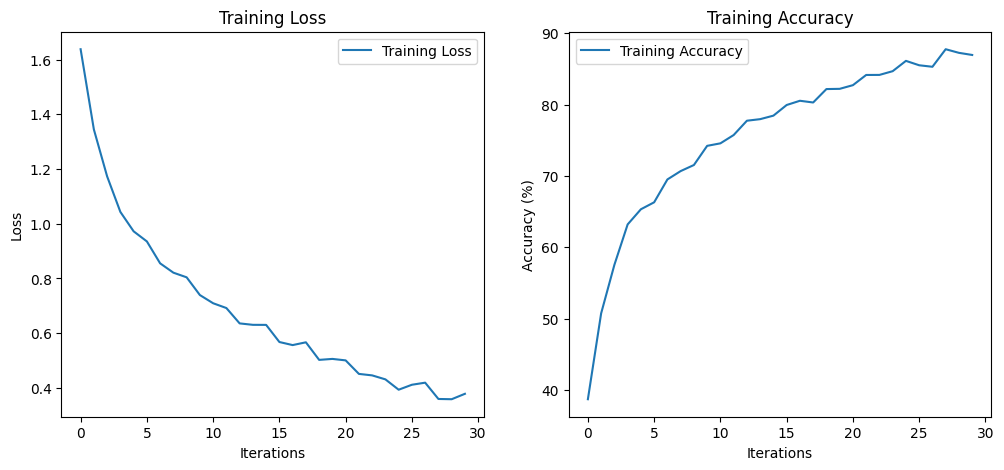

In [ ]:
#with Global Average Pooling

import torch
import torchvision
import torchvision.transforms as transforms
from torch import nn, optim
from torch.utils.data import DataLoader
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Step 1: Load the CIFAR-10 dataset with transformations
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])  # Normalize for 3 channels

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

# Step 2: Adjust the CNN architecture to handle 3 channel input
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 128, 3, padding=1)  # Changed from 1 to 3 to handle RGB channels
        self.bn1 = nn.BatchNorm2d(128)
        self.conv2 = nn.Conv2d(128, 128, 3, padding=1)
        self.bn2 = nn.BatchNorm2d(128)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(128, 256, 3, padding=1)
        self.bn3 = nn.BatchNorm2d(256)
        self.conv4 = nn.Conv2d(256, 256, 3, padding=1)
        self.bn4 = nn.BatchNorm2d(256)
        self.global_avg_pool = nn.AdaptiveAvgPool2d(1)
        self.fc1 = nn.Linear(256, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = F.relu(self.bn3(self.conv3(x)))
        x = self.pool(F.relu(self.bn4(self.conv4(x))))
        x = self.global_avg_pool(x)
        x = x.view(-1, 256)  # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Step 3: Setup GPU usage
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net_with_gap = Net().to(device)

# Step 4: Setup the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net_with_gap.parameters(), lr=0.001)

# Step 5: Train the network
train_losses = []
train_accuracy = []

for epoch in range(10):
    running_loss = 0.0
    correct = 0
    total = 0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = net_with_gap(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        if i % 200 == 199:  # print and record every 200 mini-batches
            avg_loss = running_loss / 200
            accuracy = 100 * correct / total
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {avg_loss:.3f}, Accuracy: {accuracy:.2f}%')
            train_losses.append(avg_loss)
            train_accuracy.append(accuracy)
            running_loss = 0.0
            correct = 0
            total = 0

print('Finished Training')

# Step 6: Evaluate the network on the test data
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net_with_gap(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10,000 test images: {100 * correct / total}%')

# Step 7: Plot the learning curves for accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.show()

In [ ]:
# prompt: count the total number of learnable parameters

total_params = sum(p.numel() for p in net_with_gap.parameters())
print(f"Total Parameters: {total_params/1000} k")

Total Parameters: 1072.138 k


Files already downloaded and verified
Files already downloaded and verified
Epoch 1, Batch 200, Loss: 1.917, Accuracy: 33.80%
Epoch 1, Batch 400, Loss: 1.343, Accuracy: 51.53%
Epoch 1, Batch 600, Loss: 1.144, Accuracy: 59.08%
Epoch 2, Batch 200, Loss: 0.917, Accuracy: 67.91%
Epoch 2, Batch 400, Loss: 0.873, Accuracy: 69.63%
Epoch 2, Batch 600, Loss: 0.810, Accuracy: 71.30%
Epoch 3, Batch 200, Loss: 0.703, Accuracy: 75.46%
Epoch 3, Batch 400, Loss: 0.674, Accuracy: 76.56%
Epoch 3, Batch 600, Loss: 0.650, Accuracy: 77.52%
Epoch 4, Batch 200, Loss: 0.560, Accuracy: 80.12%
Epoch 4, Batch 400, Loss: 0.557, Accuracy: 80.55%
Epoch 4, Batch 600, Loss: 0.574, Accuracy: 79.76%
Epoch 5, Batch 200, Loss: 0.450, Accuracy: 84.06%
Epoch 5, Batch 400, Loss: 0.464, Accuracy: 83.66%
Epoch 5, Batch 600, Loss: 0.486, Accuracy: 82.93%
Epoch 6, Batch 200, Loss: 0.370, Accuracy: 87.06%
Epoch 6, Batch 400, Loss: 0.386, Accuracy: 86.74%
Epoch 6, Batch 600, Loss: 0.388, Accuracy: 86.44%
Epoch 7, Batch 200, Loss

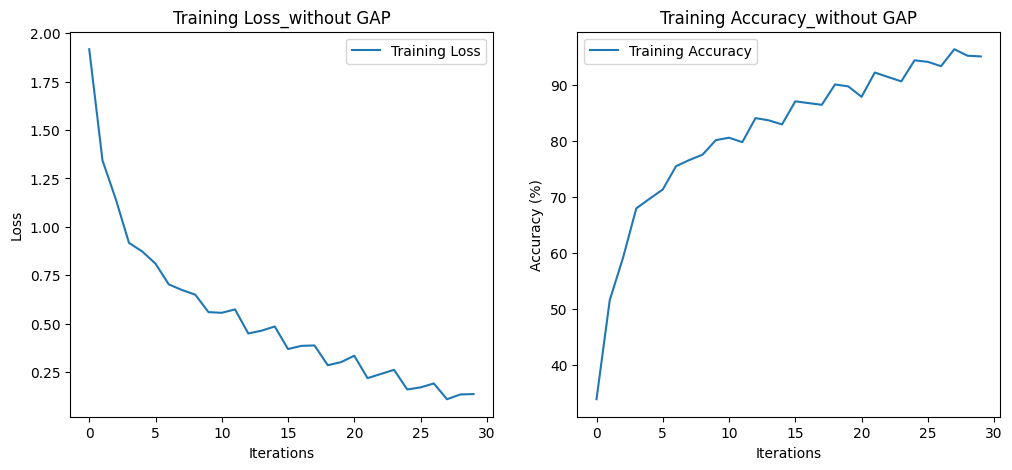

In [14]:
#CNN WITHOUT GAP
#without Global Average Pooling

import torch
import torchvision
import torchvision.transforms as transforms
from torch import nn, optim
from torch.utils.data import DataLoader
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Step 1: Load the CIFAR-10 dataset with transformations
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])  # Normalize for 3 channels

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

# Step 2: Adjust the CNN architecture to handle 3 channel input
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 128, 3, padding=1)  # Changed from 1 to 3 to handle RGB channels
        self.bn1 = nn.BatchNorm2d(128)    #for each activation map
        self.conv2 = nn.Conv2d(128, 128, 3, padding=1)
        self.bn2 = nn.BatchNorm2d(128)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(128, 256, 3, padding=1)
        self.bn3 = nn.BatchNorm2d(256)
        self.conv4 = nn.Conv2d(256, 256, 3, padding=1)
        self.bn4 = nn.BatchNorm2d(256)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(256*8*8, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = F.relu(self.bn3(self.conv3(x)))
        x = self.pool(F.relu(self.bn4(self.conv4(x))))
        #x = self.global_avg_pool(x)
        #x = x.view(-1, 256)  # flatten all dimensions except batch
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


# Step 3: Setup GPU usage
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net_without_gap = Net().to(device)

# Step 4: Setup the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net_without_gap.parameters(), lr=0.001)

# Step 5: Train the network
train_losses = []
train_accuracy = []

for epoch in range(10):
    running_loss = 0.0
    correct = 0
    total = 0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = net_without_gap(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        if i % 200 == 199:  # print and record every 200 mini-batches
            avg_loss = running_loss / 200
            accuracy = 100 * correct / total
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {avg_loss:.3f}, Accuracy: {accuracy:.2f}%')
            train_losses.append(avg_loss)
            train_accuracy.append(accuracy)
            running_loss = 0.0
            correct = 0
            total = 0

print('Finished Training')

# Step 6: Evaluate the network on the test data
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net_without_gap(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10,000 test images: {100 * correct / total}%')

# Step 7: Plot the learning curves for accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.title('Training Loss_without GAP')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.title('Training Accuracy_without GAP')
plt.xlabel('Iterations')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.show()

In [15]:
# prompt: count the total number of learnable parameters

total_params = sum(p.numel() for p in net_without_gap.parameters())
print(f"Total Parameters: {total_params/1000} k")

Total Parameters: 3136.522 k


# CNN without GAP - 1M개의 파라미터로 학습 - conv layer 사이즈 조절해 파라미터의 수 조절하는 경우


100%|██████████| 170498071/170498071 [00:03<00:00, 52181069.79it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Epoch 1, Batch 200, Loss: 1.938, Accuracy: 33.73%
Epoch 1, Batch 400, Loss: 1.343, Accuracy: 51.63%
Epoch 1, Batch 600, Loss: 1.129, Accuracy: 59.21%
Epoch 2, Batch 200, Loss: 0.917, Accuracy: 67.45%
Epoch 2, Batch 400, Loss: 0.829, Accuracy: 70.34%
Epoch 2, Batch 600, Loss: 0.821, Accuracy: 71.23%
Epoch 3, Batch 200, Loss: 0.682, Accuracy: 75.92%
Epoch 3, Batch 400, Loss: 0.684, Accuracy: 76.34%
Epoch 3, Batch 600, Loss: 0.675, Accuracy: 76.23%
Epoch 4, Batch 200, Loss: 0.555, Accuracy: 80.33%
Epoch 4, Batch 400, Loss: 0.569, Accuracy: 80.20%
Epoch 4, Batch 600, Loss: 0.571, Accuracy: 80.03%
Epoch 5, Batch 200, Loss: 0.461, Accuracy: 83.74%
Epoch 5, Batch 400, Loss: 0.475, Accuracy: 83.27%
Epoch 5, Batch 600, Loss: 0.459, Accuracy: 83.86%
Epoch 6, Batch 200, Loss: 0.370, Accuracy: 87.03%
Epoch 6, Batch 400, Loss: 0.394, Accuracy: 86.12%
Epoch 6, Batch 600, Loss: 0.395, Accuracy: 86.38%
Epoch 7, Ba

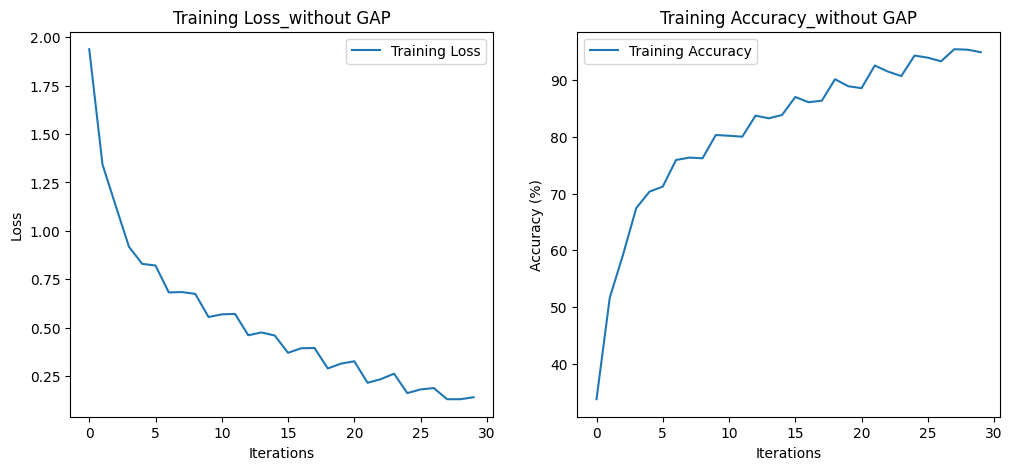

In [ ]:
#without Global Average Pooling

import torch
import torchvision
import torchvision.transforms as transforms
from torch import nn, optim
from torch.utils.data import DataLoader
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Step 1: Load the CIFAR-10 dataset with transformations
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])  # Normalize for 3 channels

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

# Step 2: Adjust the CNN architecture to handle 3 channel input
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 128, 3, padding=1)  # Changed from 1 to 3 to handle RGB channels
        self.bn1 = nn.BatchNorm2d(128)    #for each activation map
        self.conv2 = nn.Conv2d(128, 128, 3, padding=1)
        self.bn2 = nn.BatchNorm2d(128)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(128, 256, 3, padding=1)
        self.bn3 = nn.BatchNorm2d(256)
        self.conv4 = nn.Conv2d(256, 256, 3, padding=1)
        self.bn4 = nn.BatchNorm2d(256)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(256*8*8, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = F.relu(self.bn3(self.conv3(x)))
        x = self.pool(F.relu(self.bn4(self.conv4(x))))
        #x = self.global_avg_pool(x)
        #x = x.view(-1, 256)  # flatten all dimensions except batch
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


# Step 3: Setup GPU usage
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net_without_gap = Net().to(device)

# Step 4: Setup the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net_without_gap.parameters(), lr=0.001)

# Step 5: Train the network
train_losses = []
train_accuracy = []

for epoch in range(10):
    running_loss = 0.0
    correct = 0
    total = 0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = net_without_gap(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        if i % 200 == 199:  # print and record every 200 mini-batches
            avg_loss = running_loss / 200
            accuracy = 100 * correct / total
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {avg_loss:.3f}, Accuracy: {accuracy:.2f}%')
            train_losses.append(avg_loss)
            train_accuracy.append(accuracy)
            running_loss = 0.0
            correct = 0
            total = 0

print('Finished Training')

# Step 6: Evaluate the network on the test data
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net_without_gap(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10,000 test images: {100 * correct / total}%')

# Step 7: Plot the learning curves for accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.title('Training Loss_without GAP')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.title('Training Accuracy_without GAP')
plt.xlabel('Iterations')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.show()

Files already downloaded and verified
Files already downloaded and verified
Epoch 1, Batch 200, Loss: 1.607, Accuracy: 41.70%
Epoch 1, Batch 400, Loss: 1.252, Accuracy: 54.84%
Epoch 1, Batch 600, Loss: 1.031, Accuracy: 63.23%
Epoch 2, Batch 200, Loss: 0.824, Accuracy: 70.94%
Epoch 2, Batch 400, Loss: 0.763, Accuracy: 73.20%
Epoch 2, Batch 600, Loss: 0.766, Accuracy: 73.29%
Epoch 3, Batch 200, Loss: 0.671, Accuracy: 76.37%
Epoch 3, Batch 400, Loss: 0.647, Accuracy: 77.18%
Epoch 3, Batch 600, Loss: 0.619, Accuracy: 78.18%
Epoch 4, Batch 200, Loss: 0.533, Accuracy: 81.31%
Epoch 4, Batch 400, Loss: 0.543, Accuracy: 81.09%
Epoch 4, Batch 600, Loss: 0.533, Accuracy: 81.11%
Epoch 5, Batch 200, Loss: 0.439, Accuracy: 85.17%
Epoch 5, Batch 400, Loss: 0.464, Accuracy: 83.49%
Epoch 5, Batch 600, Loss: 0.445, Accuracy: 84.35%
Epoch 6, Batch 200, Loss: 0.359, Accuracy: 87.27%
Epoch 6, Batch 400, Loss: 0.384, Accuracy: 86.23%
Epoch 6, Batch 600, Loss: 0.395, Accuracy: 86.10%
Epoch 7, Batch 200, Loss

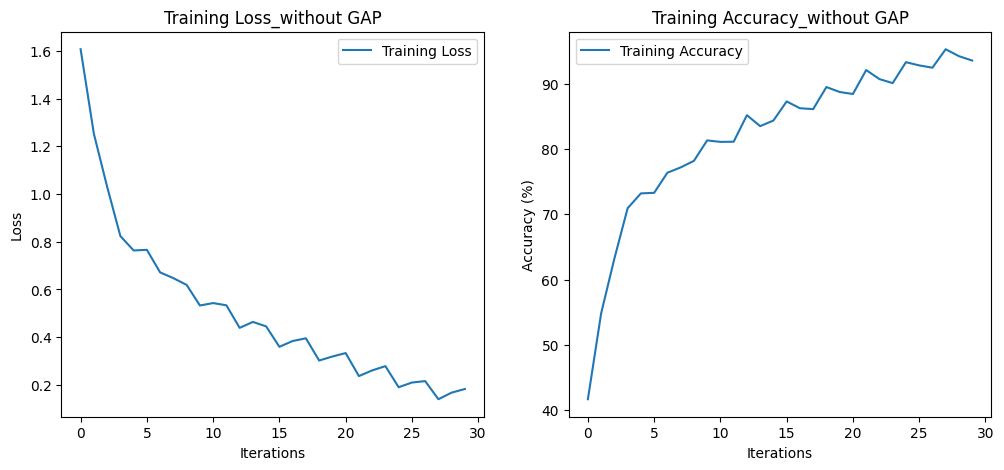

In [ ]:
##without GAP 수정버전 - parameter 수 1M개로 제한 - conv layer에 대해 128로 채널 수 다 통일
#without Global Average Pooling

import torch
import torchvision
import torchvision.transforms as transforms
from torch import nn, optim
from torch.utils.data import DataLoader
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Step 1: Load the CIFAR-10 dataset with transformations
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])  # Normalize for 3 channels

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

# Step 2: Adjust the CNN architecture to handle 3 channel input
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3,128, 3, padding=1)  # 필터 수를 128에서 64로 줄임
        self.bn1 = nn.BatchNorm2d(128)
        self.conv2 = nn.Conv2d(128, 128, 3, padding=1)  # 필터 수를 128에서 64로 줄임
        self.bn2 = nn.BatchNorm2d(128)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(128, 128, 3, padding=1)  # 필터 수를 256에서 128로 줄임
        self.bn3 = nn.BatchNorm2d(128)
        self.conv4 = nn.Conv2d(128, 128, 3, padding=1)  # 필터 수를 256에서 128로 줄임
        self.bn4 = nn.BatchNorm2d(128)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(128*8*8, 64)  # 출력 크기를 128에서 64로 줄임
        self.fc2 = nn.Linear(64, 10)  # 출력 크기를 128에서 64로 줄임

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = F.relu(self.bn3(self.conv3(x)))
        x = self.pool(F.relu(self.bn4(self.conv4(x))))
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x



# Step 3: Setup GPU usage
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net_without_gap = Net().to(device)

# Step 4: Setup the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net_without_gap.parameters(), lr=0.001)

# Step 5: Train the network
train_losses = []
train_accuracy = []

for epoch in range(10):
    running_loss = 0.0
    correct = 0
    total = 0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = net_without_gap(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        if i % 200 == 199:  # print and record every 200 mini-batches
            avg_loss = running_loss / 200
            accuracy = 100 * correct / total
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {avg_loss:.3f}, Accuracy: {accuracy:.2f}%')
            train_losses.append(avg_loss)
            train_accuracy.append(accuracy)
            running_loss = 0.0
            correct = 0
            total = 0

print('Finished Training')

# Step 6: Evaluate the network on the test data
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net_without_gap(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10,000 test images: {100 * correct / total}%')

# Step 7: Plot the learning curves for accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.title('Training Loss_without GAP')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.title('Training Accuracy_without GAP')
plt.xlabel('Iterations')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.show()

Files already downloaded and verified
Files already downloaded and verified
Epoch 1, Batch 200, Loss: 2.122, Accuracy: 21.45%
Epoch 1, Batch 400, Loss: 1.730, Accuracy: 29.65%
Epoch 1, Batch 600, Loss: 1.535, Accuracy: 39.21%
Epoch 2, Batch 200, Loss: 1.370, Accuracy: 46.90%
Epoch 2, Batch 400, Loss: 1.339, Accuracy: 47.50%
Epoch 2, Batch 600, Loss: 1.266, Accuracy: 51.09%
Epoch 3, Batch 200, Loss: 1.140, Accuracy: 57.48%
Epoch 3, Batch 400, Loss: 1.108, Accuracy: 59.60%
Epoch 3, Batch 600, Loss: 1.062, Accuracy: 60.45%
Epoch 4, Batch 200, Loss: 0.979, Accuracy: 63.23%
Epoch 4, Batch 400, Loss: 0.965, Accuracy: 64.83%
Epoch 4, Batch 600, Loss: 0.944, Accuracy: 65.40%
Epoch 5, Batch 200, Loss: 0.867, Accuracy: 68.27%
Epoch 5, Batch 400, Loss: 0.855, Accuracy: 68.50%
Epoch 5, Batch 600, Loss: 0.886, Accuracy: 67.72%
Epoch 6, Batch 200, Loss: 0.768, Accuracy: 71.69%
Epoch 6, Batch 400, Loss: 0.786, Accuracy: 70.82%
Epoch 6, Batch 600, Loss: 0.775, Accuracy: 71.28%
Epoch 7, Batch 200, Loss

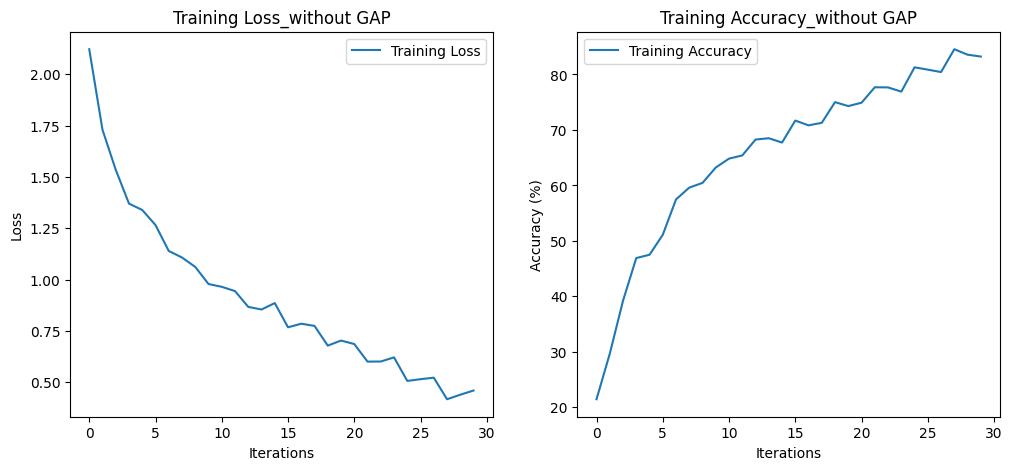

In [ ]:
##without GAP 수정버전 - parameter 수 1M개로 제한 - fc layer 마지막 layer node 수 32개로 조절
#without Global Average Pooling

import torch
import torchvision
import torchvision.transforms as transforms
from torch import nn, optim
from torch.utils.data import DataLoader
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Step 1: Load the CIFAR-10 dataset with transformations
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])  # Normalize for 3 channels

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

# Step 2: Adjust the CNN architecture to handle 3 channel input
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3,128, 3, padding=1)  # 필터 수를 128에서 64로 줄임
        self.bn1 = nn.BatchNorm2d(128)
        self.conv2 = nn.Conv2d(128, 128, 3, padding=1)  # 필터 수를 128에서 64로 줄임
        self.bn2 = nn.BatchNorm2d(128)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(128, 256, 3, padding=1)  # 필터 수를 256에서 128로 줄임
        self.bn3 = nn.BatchNorm2d(256)
        self.conv4 = nn.Conv2d(256, 256, 3, padding=1)  # 필터 수를 256에서 128로 줄임
        self.bn4 = nn.BatchNorm2d(256)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(256*8*8, 32)  # 출력 크기를 128에서 64로 줄임
        self.fc2 = nn.Linear(32, 10)  # 출력 크기를 128에서 64로 줄임

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = F.relu(self.bn3(self.conv3(x)))
        x = self.pool(F.relu(self.bn4(self.conv4(x))))
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x



# Step 3: Setup GPU usage
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net_without_gap = Net().to(device)

# Step 4: Setup the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net_without_gap.parameters(), lr=0.001)

# Step 5: Train the network
train_losses = []
train_accuracy = []

for epoch in range(10):
    running_loss = 0.0
    correct = 0
    total = 0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = net_without_gap(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        if i % 200 == 199:  # print and record every 200 mini-batches
            avg_loss = running_loss / 200
            accuracy = 100 * correct / total
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {avg_loss:.3f}, Accuracy: {accuracy:.2f}%')
            train_losses.append(avg_loss)
            train_accuracy.append(accuracy)
            running_loss = 0.0
            correct = 0
            total = 0

print('Finished Training')

# Step 6: Evaluate the network on the test data
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net_without_gap(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10,000 test images: {100 * correct / total}%')

# Step 7: Plot the learning curves for accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.title('Training Loss_without GAP')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.title('Training Accuracy_without GAP')
plt.xlabel('Iterations')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.show()

# **실습 과제 3.**

위 실습 과제 2, GAP를 추가한 모델에서 BatchNorm을 추가하기 전과 후를 각각 학습시키고 결과를 논의하세요.

# With BatchNorm

Files already downloaded and verified
Files already downloaded and verified
Epoch 1, Batch 200, Loss: 1.654, Accuracy: 37.55%
Epoch 1, Batch 400, Loss: 1.344, Accuracy: 50.78%
Epoch 1, Batch 600, Loss: 1.195, Accuracy: 56.95%
Epoch 2, Batch 200, Loss: 1.046, Accuracy: 62.52%
Epoch 2, Batch 400, Loss: 0.962, Accuracy: 65.70%
Epoch 2, Batch 600, Loss: 0.939, Accuracy: 66.44%
Epoch 3, Batch 200, Loss: 0.845, Accuracy: 69.58%
Epoch 3, Batch 400, Loss: 0.828, Accuracy: 70.75%
Epoch 3, Batch 600, Loss: 0.812, Accuracy: 71.44%
Epoch 4, Batch 200, Loss: 0.740, Accuracy: 73.96%
Epoch 4, Batch 400, Loss: 0.724, Accuracy: 74.65%
Epoch 4, Batch 600, Loss: 0.684, Accuracy: 75.71%
Epoch 5, Batch 200, Loss: 0.648, Accuracy: 77.12%
Epoch 5, Batch 400, Loss: 0.635, Accuracy: 77.53%
Epoch 5, Batch 600, Loss: 0.652, Accuracy: 76.86%
Epoch 6, Batch 200, Loss: 0.589, Accuracy: 79.24%
Epoch 6, Batch 400, Loss: 0.564, Accuracy: 79.83%
Epoch 6, Batch 600, Loss: 0.552, Accuracy: 81.20%
Epoch 7, Batch 200, Loss

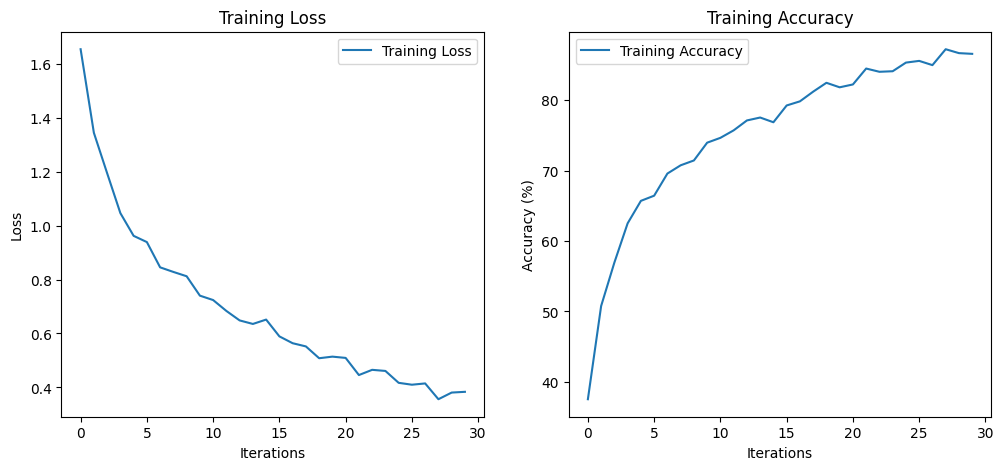

In [ ]:
#with BatchNorm

import torch
import torchvision
import torchvision.transforms as transforms
from torch import nn, optim
from torch.utils.data import DataLoader
import torch.nn.functional as F
import matplotlib.pyplot as plt
import time

# Step 1: Load the CIFAR-10 dataset with transformations
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])  # Normalize for 3 channels

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

# Step 2: Adjust the CNN architecture to handle 3 channel input
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 128, 3, padding=1)  # Changed from 1 to 3 to handle RGB channels
        self.bn1 = nn.BatchNorm2d(128)
        self.conv2 = nn.Conv2d(128, 128, 3, padding=1)
        self.bn2 = nn.BatchNorm2d(128)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(128, 256, 3, padding=1)
        self.bn3 = nn.BatchNorm2d(256)
        self.conv4 = nn.Conv2d(256, 256, 3, padding=1)
        self.bn4 = nn.BatchNorm2d(256)
        self.global_avg_pool = nn.AdaptiveAvgPool2d(1)
        self.fc1 = nn.Linear(256, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = F.relu(self.bn3(self.conv3(x)))
        x = self.pool(F.relu(self.bn4(self.conv4(x))))
        x = self.global_avg_pool(x)
        x = x.view(-1, 256)  # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Step 3: Setup GPU usage
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net_with_bn = Net().to(device)

# Step 4: Setup the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net_with_bn.parameters(), lr=0.001)

# Step 5: Train the network
train_losses = []
train_accuracy = []

start_time_with_BN = time.time()
for epoch in range(10):
    running_loss = 0.0
    correct = 0
    total = 0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = net_with_bn(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        if i % 200 == 199:  # print and record every 200 mini-batches
            avg_loss = running_loss / 200
            accuracy = 100 * correct / total
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {avg_loss:.3f}, Accuracy: {accuracy:.2f}%')
            train_losses.append(avg_loss)
            train_accuracy.append(accuracy)
            running_loss = 0.0
            correct = 0
            total = 0

end_time_with_BN = time.time()
print('Finished Training')
learning_time_with_BN = end_time_with_BN - start_time_with_BN
print("Learning time with BN:", learning_time_with_BN, "seconds")

# Step 6: Evaluate the network on the test data
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net_with_bn(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10,000 test images: {100 * correct / total}%')

# Step 7: Plot the learning curves for accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.show()

In [ ]:
# prompt: count the total number of learnable parameters

total_params = sum(p.numel() for p in net_with_bn.parameters())
print(f"Total Parameters: {total_params/1000} k")

Total Parameters: 1072.138 k


# Without BatchNorm

Files already downloaded and verified
Files already downloaded and verified
Epoch 1, Batch 200, Loss: 1.963, Accuracy: 23.88%
Epoch 1, Batch 400, Loss: 1.711, Accuracy: 33.55%
Epoch 1, Batch 600, Loss: 1.568, Accuracy: 39.41%
Epoch 2, Batch 200, Loss: 1.339, Accuracy: 50.55%
Epoch 2, Batch 400, Loss: 1.222, Accuracy: 55.23%
Epoch 2, Batch 600, Loss: 1.170, Accuracy: 57.48%
Epoch 3, Batch 200, Loss: 1.044, Accuracy: 62.16%
Epoch 3, Batch 400, Loss: 0.987, Accuracy: 64.79%
Epoch 3, Batch 600, Loss: 0.967, Accuracy: 64.98%
Epoch 4, Batch 200, Loss: 0.866, Accuracy: 69.02%
Epoch 4, Batch 400, Loss: 0.854, Accuracy: 69.00%
Epoch 4, Batch 600, Loss: 0.843, Accuracy: 69.74%
Epoch 5, Batch 200, Loss: 0.794, Accuracy: 71.56%
Epoch 5, Batch 400, Loss: 0.758, Accuracy: 72.71%
Epoch 5, Batch 600, Loss: 0.722, Accuracy: 74.52%
Epoch 6, Batch 400, Loss: 0.664, Accuracy: 76.34%
Epoch 6, Batch 600, Loss: 0.673, Accuracy: 76.00%
Epoch 7, Batch 200, Loss: 0.601, Accuracy: 78.62%
Epoch 7, Batch 400, Loss

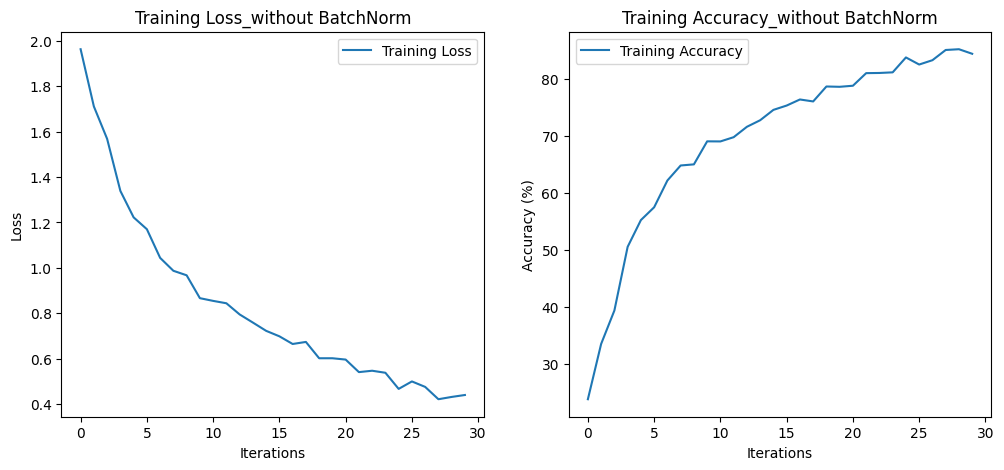

In [ ]:
#without BatchNorm

import torch
import torchvision
import torchvision.transforms as transforms
from torch import nn, optim
from torch.utils.data import DataLoader
import torch.nn.functional as F
import matplotlib.pyplot as plt
import time

# Step 1: Load the CIFAR-10 dataset with transformations
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])  # Normalize for 3 channels

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

# Step 2: Adjust the CNN architecture to handle 3 channel input
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 128, 3, padding=1)  # Changed from 1 to 3 to handle RGB channels
        self.conv2 = nn.Conv2d(128, 128, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(128, 256, 3, padding=1)
        self.conv4 = nn.Conv2d(256, 256, 3, padding=1)
        self.global_avg_pool = nn.AdaptiveAvgPool2d(1)
        self.fc1 = nn.Linear(256, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(F.relu(self.conv2(x)))
        x = F.relu(self.conv3(x))
        x = self.pool(F.relu(self.conv4(x)))
        x = self.global_avg_pool(x)
        x = x.view(-1, 256)  # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Step 3: Setup GPU usage
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net_without_bn = Net().to(device)

# Step 4: Setup the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net_without_bn.parameters(), lr=0.001)

# Step 5: Train the network
train_losses = []
train_accuracy = []

start_time_without_BN = time.time()
for epoch in range(10):
    running_loss = 0.0
    correct = 0
    total = 0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = net_without_bn(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        if i % 200 == 199:  # print and record every 200 mini-batches
            avg_loss = running_loss / 200
            accuracy = 100 * correct / total
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {avg_loss:.3f}, Accuracy: {accuracy:.2f}%')
            train_losses.append(avg_loss)
            train_accuracy.append(accuracy)
            running_loss = 0.0
            correct = 0
            total = 0

end_time_without_BN = time.time()
print('Finished Training')
learning_time_without_BN = end_time_without_BN - start_time_without_BN
print("Learning time without BN:", learning_time_without_BN, "seconds")

# Step 6: Evaluate the network on the test data
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net_without_bn(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10,000 test images: {100 * correct / total}%')

# Step 7: Plot the learning curves for accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.title('Training Loss_without BatchNorm')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.title('Training Accuracy_without BatchNorm')
plt.xlabel('Iterations')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.show()

In [ ]:
# prompt: count the total number of learnable parameters

total_params = sum(p.numel() for p in net_without_bn.parameters())
print(f"Total Parameters: {total_params/1000} k")

Total Parameters: 1070.602 k


# **실습 과제 4.**

Lab 3 Transfer Learning 실습에서 ResNet18의 (i) learnable parameters을 고정한 경우와 (ii) 마지막 3개 Layer만 제외하고 나머지 learnable parameters를 고정한 경우, (iii) 모든 레이어를 고정하지 않은 경우에 대해 학습시키고 결과를 논의하세요.

# (i) ResNet18의 learnable parameters을 고정한 경우

Files already downloaded and verified
Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1, Batch 200, Loss: 1.177, Accuracy: 63.45%
Epoch 1, Batch 400, Loss: 0.761, Accuracy: 74.85%
Epoch 1, Batch 600, Loss: 0.689, Accuracy: 77.16%
Epoch 1 - Training Loss: 0.843, Accuracy: 77.45%, Validation Loss: 0.621, Accuracy: 79.22%
Epoch 2, Batch 200, Loss: 0.634, Accuracy: 78.31%
Epoch 2, Batch 400, Loss: 0.608, Accuracy: 79.20%
Epoch 2, Batch 600, Loss: 0.625, Accuracy: 78.28%
Epoch 2 - Training Loss: 0.622, Accuracy: 78.88%, Validation Loss: 0.592, Accuracy: 79.38%
Epoch 3, Batch 200, Loss: 0.593, Accuracy: 79.55%
Epoch 3, Batch 400, Loss: 0.589, Accuracy: 79.96%
Epoch 3, Batch 600, Loss: 0.587, Accuracy: 79.87%
Epoch 3 - Training Loss: 0.592, Accuracy: 79.42%, Validation Loss: 0.562, Accuracy: 80.46%
Epoch 4, Batch 200, Loss: 0.580, Accuracy: 79.89%
Epoch 4, Batch 400, Loss: 0.587, Accuracy: 79.86%
Epoch 4, Batch 600, Loss: 0.573, Accuracy: 79.97%
Epoch 4 - Training Loss: 0.579, Accuracy: 80.14%, Validation Loss: 0.565, Accuracy: 80.10%
Epoch 5, Batch 200, Loss: 0.565, Acc

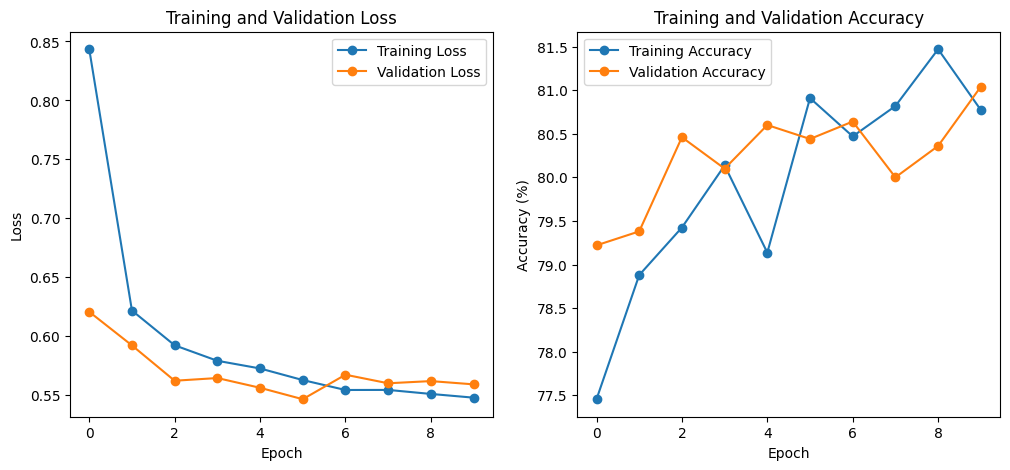

In [ ]:
#fixed learnable parameters - net_all_freeze

import torch
import torchvision
import torchvision.transforms as transforms
from torch import nn, optim
from torch.utils.data import DataLoader, SubsetRandomSampler
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torchvision.models as models

# Step 1: Load the CIFAR-10 dataset with transformations
transform = transforms.Compose([
    transforms.Resize(224),  # Resize images to fit ResNet input
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Adjusted for 3 channels
])


trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

# Same stratified split setup
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)
targets = trainset.targets
for train_index, val_index in sss.split(np.zeros(len(targets)), targets):
    train_sampler = SubsetRandomSampler(train_index)
    val_sampler = SubsetRandomSampler(val_index)

trainloader = DataLoader(trainset, batch_size=64, sampler=train_sampler)
valloader = DataLoader(trainset, batch_size=64, sampler=val_sampler)
testloader = DataLoader(testset, batch_size=64, shuffle=False)


# Step 2: Define the CNN architecture with pretrained resnet18
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        # Load a pretrained ResNet and modify it
        self.resnet = models.resnet18(pretrained=True)

        # Freeze all the layers in the network
        for param in self.resnet.parameters():
            param.requires_grad = False
            ##fix learnable parameter

        # CIFAR-10 has 10 classes, modify the last fully connected layer
        num_ftrs = self.resnet.fc.in_features
        self.resnet.fc = nn.Linear(num_ftrs, 10)  # Adjust for 10 classes

    def forward(self, x):
        return self.resnet(x)

# Step 3: Setup GPU usage
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net_all_freeze = Net().to(device)

# Step 4: Setup the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net_all_freeze.parameters(), lr=0.001)

# Step 5: Train the network and validate every epoch
train_losses = []
train_accuracy = []
train_losses_iter = []
train_accuracy_iter = []
val_losses = []
val_accuracy = []

for epoch in range(10):
    running_loss_iter = 0.0
    running_loss = 0.0
    correct = 0
    total = 0
    net_all_freeze.train()
    for i, data in enumerate(trainloader):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = net_all_freeze(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        running_loss_iter += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        if i % 200 == 199:  # print and record every 200 mini-batches
            avg_loss = running_loss_iter / 200
            accuracy = 100 * correct / total
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {avg_loss:.3f}, Accuracy: {accuracy:.2f}%')
            train_losses_iter.append(avg_loss)
            train_accuracy_iter.append(accuracy)
            running_loss_iter = 0.0
            correct = 0
            total = 0

    train_losses.append(running_loss / len(trainloader))
    train_accuracy.append(100 * correct / total)

    # Validation step
    net_all_freeze.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for data in valloader:
            inputs, labels = data[0].to(device), data[1].to(device)
            outputs = net_all_freeze(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    val_losses.append(val_loss / len(valloader))
    val_accuracy.append(100 * correct / total)

    print(f'Epoch {epoch+1} - Training Loss: {train_losses[-1]:.3f}, Accuracy: {train_accuracy[-1]:.2f}%, Validation Loss: {val_losses[-1]:.3f}, Accuracy: {val_accuracy[-1]:.2f}%')

print('Finished Training')

# Step 6: Evaluate the network on the test data
correct = 0
total = 0
net_all_freeze.eval()
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net_all_freeze(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f'Accuracy of the network on the 10,000 test images: {test_accuracy:.2f}%')

# Step 7: Plot the learning curves for accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, '-o',label='Training Loss')
plt.plot(val_losses, '-o', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracy,  '-o',label='Training Accuracy')
plt.plot(val_accuracy, '-o', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.show()



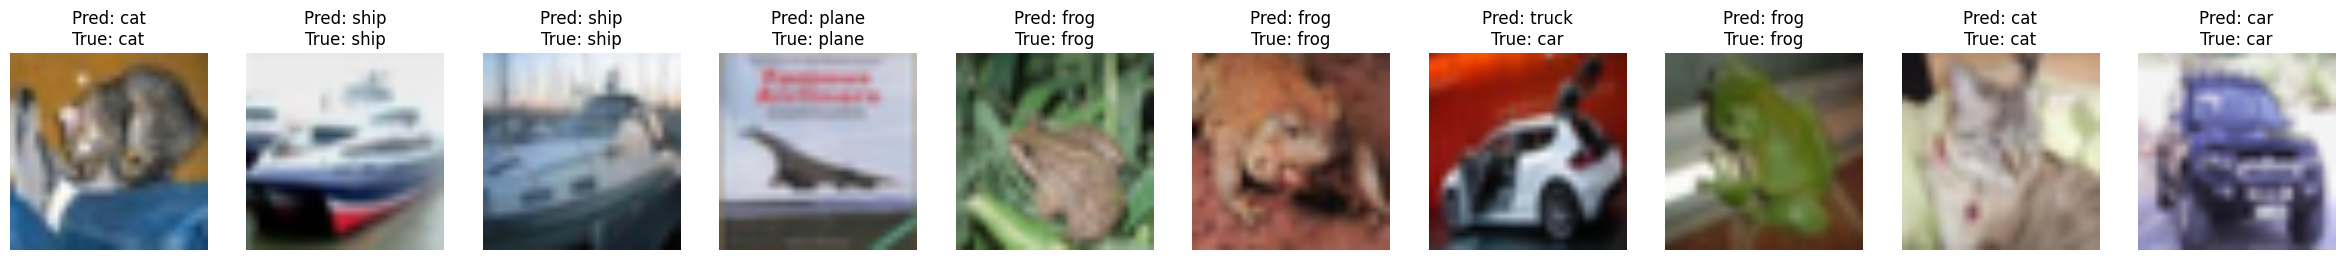

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(images, labels, predicted_labels):
    """Function to display images with labels and predictions"""
    # Set number of images to display
    num_images = len(images)
    fig, axes = plt.subplots(1, num_images, figsize=(num_images * 3, 3))

    for idx in range(num_images):
        ax = axes[idx]
        img = images[idx] / 2 + 0.5  # unnormalize
        npimg = img.numpy()
        ax.imshow(np.transpose(npimg, (1, 2, 0)))
        ax.axis('off')
        # Set title with predicted and true labels
        ax.set_title(f'Pred: {classes[predicted_labels[idx]]}\nTrue: {classes[labels[idx]]}')

# Load a batch of images
dataiter = iter(testloader)
images, labels = next(dataiter)

# Predict labels
predicted_outputs = net_all_freeze(images.to(device))
_, predicted = torch.max(predicted_outputs, 1)

# Show images with annotations
imshow(images[:10], labels[:10], predicted[:10])
plt.show()

Predicted:  cat   ship  ship  plane frog 
True:       cat   ship  ship  plane frog 


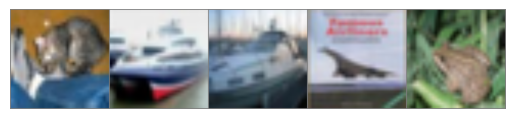

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')

# Get some random test images
dataiter = iter(testloader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images[:5]))
# Print labels
predicted_outputs = net_all_freeze(images.to(device))
_, predicted = torch.max(predicted_outputs, 1)
print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(5)))
print('True:      ', ' '.join(f'{classes[labels[j]]:5s}'
                              for j in range(5)))

plt.show()

# (ii) 마지막 3개 layer만 제외하고 나머지 learnable parameters를 고정한 경우


Files already downloaded and verified
Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1, Batch 200, Loss: 0.596, Accuracy: 79.31%
Epoch 1, Batch 400, Loss: 0.431, Accuracy: 85.62%
Epoch 1, Batch 600, Loss: 0.378, Accuracy: 86.86%
Epoch 1 - Training Loss: 0.456, Accuracy: 87.45%, Validation Loss: 0.350, Accuracy: 88.16%
Epoch 2, Batch 200, Loss: 0.206, Accuracy: 92.92%
Epoch 2, Batch 400, Loss: 0.226, Accuracy: 92.24%
Epoch 2, Batch 600, Loss: 0.228, Accuracy: 92.41%
Epoch 2 - Training Loss: 0.223, Accuracy: 91.67%, Validation Loss: 0.313, Accuracy: 89.86%
Epoch 3, Batch 200, Loss: 0.097, Accuracy: 96.82%
Epoch 3, Batch 400, Loss: 0.119, Accuracy: 96.16%
Epoch 3, Batch 600, Loss: 0.127, Accuracy: 95.55%
Epoch 3 - Training Loss: 0.121, Accuracy: 94.61%, Validation Loss: 0.349, Accuracy: 89.52%
Epoch 4, Batch 200, Loss: 0.073, Accuracy: 97.50%
Epoch 4, Batch 400, Loss: 0.071, Accuracy: 97.38%
Epoch 4, Batch 600, Loss: 0.087, Accuracy: 97.01%
Epoch 4 - Training Loss: 0.079, Accuracy: 97.03%, Validation Loss: 0.443, Accuracy: 89.00%
Epoch 5, Batch 200, Loss: 0.058, Acc

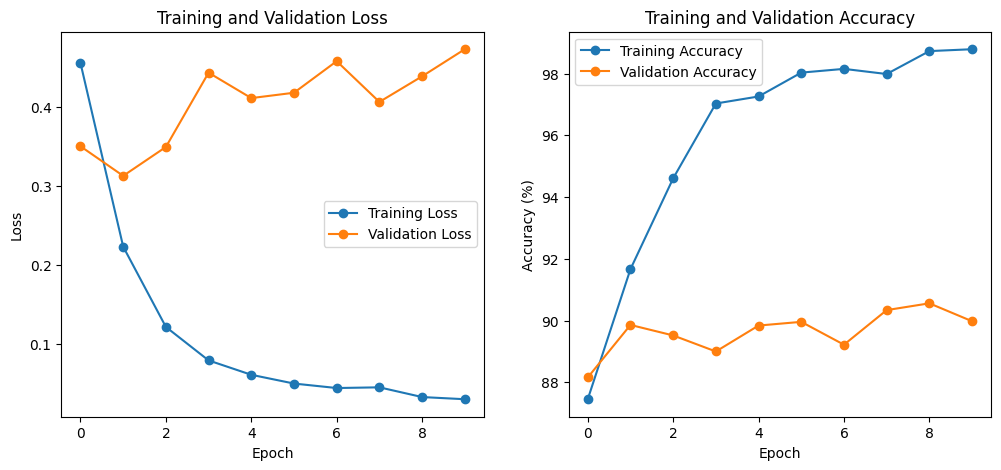

In [ ]:
#fixed learnable parameters except last 3 layer - net_partial_freeze

import torch
import torchvision
import torchvision.transforms as transforms
from torch import nn, optim
from torch.utils.data import DataLoader, SubsetRandomSampler
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torchvision.models as models

# Step 1: Load the CIFAR-10 dataset with transformations
transform = transforms.Compose([
    transforms.Resize(224),  # Resize images to fit ResNet input
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Adjusted for 3 channels
])


trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

# Same stratified split setup
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)
targets = trainset.targets
for train_index, val_index in sss.split(np.zeros(len(targets)), targets):
    train_sampler = SubsetRandomSampler(train_index)
    val_sampler = SubsetRandomSampler(val_index)

trainloader = DataLoader(trainset, batch_size=64, sampler=train_sampler)
valloader = DataLoader(trainset, batch_size=64, sampler=val_sampler)
testloader = DataLoader(testset, batch_size=64, shuffle=False)


# Step 2: Define the CNN architecture with pretrained resnet18
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        # Load a pretrained ResNet and modify it
        self.resnet = models.resnet18(pretrained=True)

        # Freeze all the layers in the network
        for param in self.resnet.parameters():
            param.requires_grad = False

        # No freeze for last 3 layer - in layer4
        for child in self.resnet.layer4.children():
          for param in child.parameters():
            param.requires_grad = True

        # CIFAR-10 has 10 classes, modify the last fully connected layer
        num_ftrs = self.resnet.fc.in_features
        self.resnet.fc = nn.Linear(num_ftrs, 10)  # Adjust for 10 classes

    def forward(self, x):
        return self.resnet(x)

# Step 3: Setup GPU usage
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net_partial_freeze = Net().to(device)

# Step 4: Setup the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net_partial_freeze.parameters(), lr=0.001)

# Step 5: Train the network and validate every epoch
train_losses = []
train_accuracy = []
train_losses_iter = []
train_accuracy_iter = []
val_losses = []
val_accuracy = []

for epoch in range(10):
    running_loss_iter = 0.0
    running_loss = 0.0
    correct = 0
    total = 0
    net_partial_freeze.train()
    for i, data in enumerate(trainloader):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = net_partial_freeze(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        running_loss_iter += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        if i % 200 == 199:  # print and record every 200 mini-batches
            avg_loss = running_loss_iter / 200
            accuracy = 100 * correct / total
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {avg_loss:.3f}, Accuracy: {accuracy:.2f}%')
            train_losses_iter.append(avg_loss)
            train_accuracy_iter.append(accuracy)
            running_loss_iter = 0.0
            correct = 0
            total = 0

    train_losses.append(running_loss / len(trainloader))
    train_accuracy.append(100 * correct / total)

    # Validation step
    net_partial_freeze.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for data in valloader:
            inputs, labels = data[0].to(device), data[1].to(device)
            outputs = net_partial_freeze(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    val_losses.append(val_loss / len(valloader))
    val_accuracy.append(100 * correct / total)

    print(f'Epoch {epoch+1} - Training Loss: {train_losses[-1]:.3f}, Accuracy: {train_accuracy[-1]:.2f}%, Validation Loss: {val_losses[-1]:.3f}, Accuracy: {val_accuracy[-1]:.2f}%')

print('Finished Training')

# Step 6: Evaluate the network on the test data
correct = 0
total = 0
net_partial_freeze.eval()
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net_partial_freeze(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f'Accuracy of the network on the 10,000 test images: {test_accuracy:.2f}%')

# Step 7: Plot the learning curves for accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, '-o',label='Training Loss')
plt.plot(val_losses, '-o', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracy,  '-o',label='Training Accuracy')
plt.plot(val_accuracy, '-o', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.show()



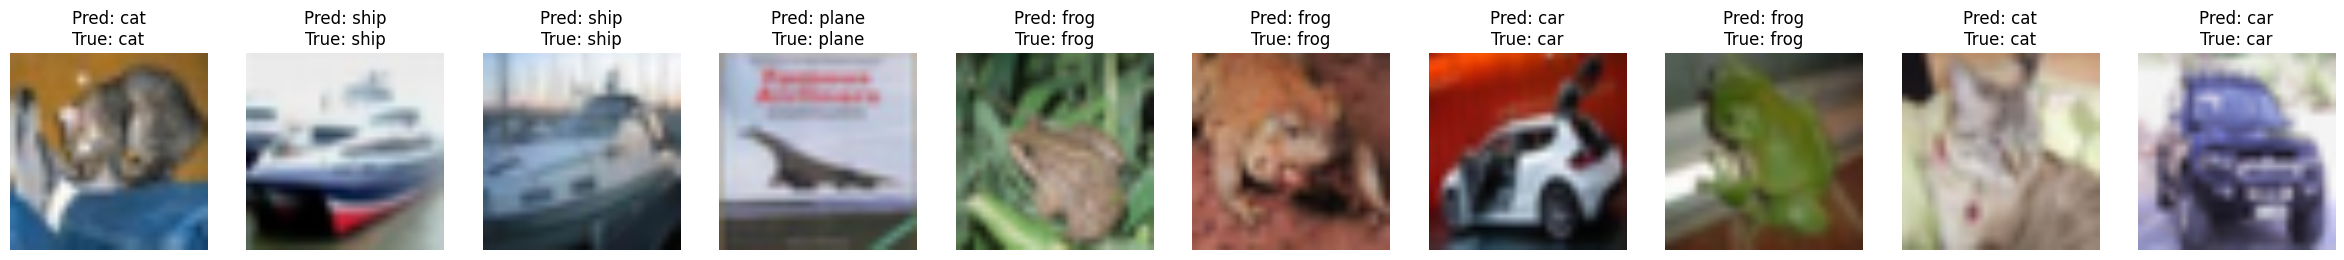

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(images, labels, predicted_labels):
    """Function to display images with labels and predictions"""
    # Set number of images to display
    num_images = len(images)
    fig, axes = plt.subplots(1, num_images, figsize=(num_images * 3, 3))

    for idx in range(num_images):
        ax = axes[idx]
        img = images[idx] / 2 + 0.5  # unnormalize
        npimg = img.numpy()
        ax.imshow(np.transpose(npimg, (1, 2, 0)))
        ax.axis('off')
        # Set title with predicted and true labels
        ax.set_title(f'Pred: {classes[predicted_labels[idx]]}\nTrue: {classes[labels[idx]]}')

# Load a batch of images
dataiter = iter(testloader)
images, labels = next(dataiter)

# Predict labels
predicted_outputs = net_partial_freeze(images.to(device))
_, predicted = torch.max(predicted_outputs, 1)

# Show images with annotations
imshow(images[:10], labels[:10], predicted[:10])
plt.show()

Predicted:  cat   ship  ship  plane frog 
True:       cat   ship  ship  plane frog 


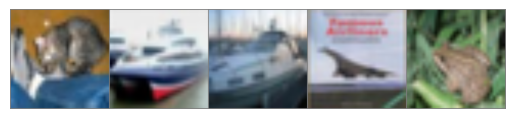

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')

# Get some random test images
dataiter = iter(testloader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images[:5]))
# Print labels
predicted_outputs = net_partial_freeze(images.to(device))
_, predicted = torch.max(predicted_outputs, 1)
print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(5)))
print('True:      ', ' '.join(f'{classes[labels[j]]:5s}'
                              for j in range(5)))

plt.show()

# (iii) 모든 레이어를 고정하지 않은 경우

Files already downloaded and verified
Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1, Batch 200, Loss: 0.748, Accuracy: 74.36%
Epoch 1, Batch 400, Loss: 0.533, Accuracy: 81.98%
Epoch 1, Batch 600, Loss: 0.477, Accuracy: 83.38%
Epoch 1 - Training Loss: 0.565, Accuracy: 84.76%, Validation Loss: 0.423, Accuracy: 85.46%
Epoch 2, Batch 200, Loss: 0.330, Accuracy: 88.62%
Epoch 2, Batch 400, Loss: 0.333, Accuracy: 88.84%
Epoch 2, Batch 600, Loss: 0.310, Accuracy: 89.20%
Epoch 2 - Training Loss: 0.325, Accuracy: 88.59%, Validation Loss: 0.404, Accuracy: 86.30%
Epoch 3, Batch 200, Loss: 0.210, Accuracy: 92.69%
Epoch 3, Batch 400, Loss: 0.246, Accuracy: 91.47%
Epoch 3, Batch 600, Loss: 0.244, Accuracy: 91.76%
Epoch 3 - Training Loss: 0.230, Accuracy: 92.85%, Validation Loss: 0.301, Accuracy: 90.38%
Epoch 4, Batch 200, Loss: 0.131, Accuracy: 95.64%
Epoch 4, Batch 400, Loss: 0.182, Accuracy: 93.68%
Epoch 4, Batch 600, Loss: 0.175, Accuracy: 93.87%
Epoch 4 - Training Loss: 0.167, Accuracy: 93.53%, Validation Loss: 0.331, Accuracy: 88.90%
Epoch 5, Batch 200, Loss: 0.093, Acc

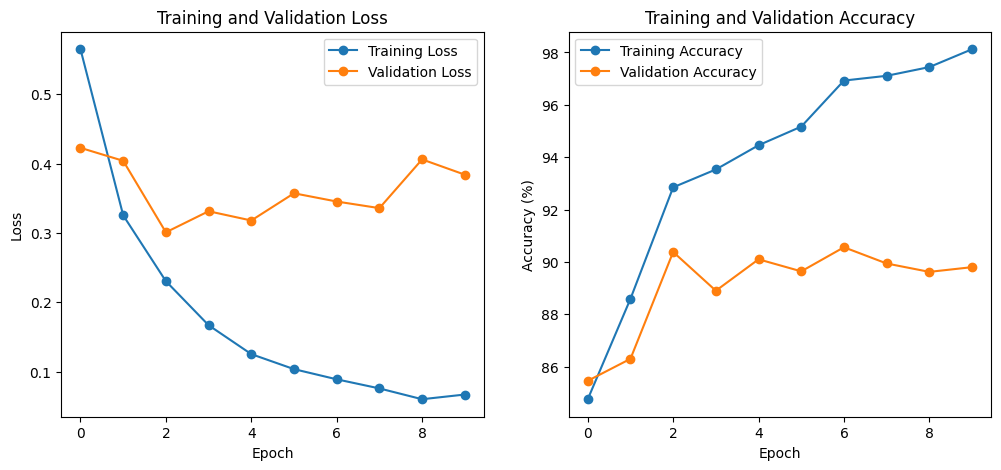

In [ ]:
#no fixed learnable parameter - net_no_freeze

import torch
import torchvision
import torchvision.transforms as transforms
from torch import nn, optim
from torch.utils.data import DataLoader, SubsetRandomSampler
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torchvision.models as models

# Step 1: Load the CIFAR-10 dataset with transformations
transform = transforms.Compose([
    transforms.Resize(224),  # Resize images to fit ResNet input
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Adjusted for 3 channels
])


trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

# Same stratified split setup
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)
targets = trainset.targets
for train_index, val_index in sss.split(np.zeros(len(targets)), targets):
    train_sampler = SubsetRandomSampler(train_index)
    val_sampler = SubsetRandomSampler(val_index)

trainloader = DataLoader(trainset, batch_size=64, sampler=train_sampler)
valloader = DataLoader(trainset, batch_size=64, sampler=val_sampler)
testloader = DataLoader(testset, batch_size=64, shuffle=False)


# Step 2: Define the CNN architecture with pretrained resnet18
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        # Load a pretrained ResNet and modify it
        self.resnet = models.resnet18(pretrained=True)

        # Freeze all the layers in the network - remove this part!
        #for param in self.resnet.parameters():
        #     param.requires_grad = False


        # CIFAR-10 has 10 classes, modify the last fully connected layer
        num_ftrs = self.resnet.fc.in_features
        self.resnet.fc = nn.Linear(num_ftrs, 10)  # Adjust for 10 classes

    def forward(self, x):
        return self.resnet(x)

# Step 3: Setup GPU usage
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net_no_freeze = Net().to(device)

# Step 4: Setup the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net_no_freeze.parameters(), lr=0.001)

# Step 5: Train the network and validate every epoch
train_losses = []
train_accuracy = []
train_losses_iter = []
train_accuracy_iter = []
val_losses = []
val_accuracy = []

for epoch in range(10):
    running_loss_iter = 0.0
    running_loss = 0.0
    correct = 0
    total = 0
    net_no_freeze.train()
    for i, data in enumerate(trainloader):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = net_no_freeze(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        running_loss_iter += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        if i % 200 == 199:  # print and record every 200 mini-batches
            avg_loss = running_loss_iter / 200
            accuracy = 100 * correct / total
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {avg_loss:.3f}, Accuracy: {accuracy:.2f}%')
            train_losses_iter.append(avg_loss)
            train_accuracy_iter.append(accuracy)
            running_loss_iter = 0.0
            correct = 0
            total = 0

    train_losses.append(running_loss / len(trainloader))
    train_accuracy.append(100 * correct / total)

    # Validation step
    net_no_freeze.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for data in valloader:
            inputs, labels = data[0].to(device), data[1].to(device)
            outputs = net_no_freeze(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    val_losses.append(val_loss / len(valloader))
    val_accuracy.append(100 * correct / total)

    print(f'Epoch {epoch+1} - Training Loss: {train_losses[-1]:.3f}, Accuracy: {train_accuracy[-1]:.2f}%, Validation Loss: {val_losses[-1]:.3f}, Accuracy: {val_accuracy[-1]:.2f}%')

print('Finished Training')

# Step 6: Evaluate the network on the test data
correct = 0
total = 0
net_no_freeze.eval()
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net_no_freeze(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f'Accuracy of the network on the 10,000 test images: {test_accuracy:.2f}%')

# Step 7: Plot the learning curves for accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, '-o',label='Training Loss')
plt.plot(val_losses, '-o', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracy,  '-o',label='Training Accuracy')
plt.plot(val_accuracy, '-o', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.show()

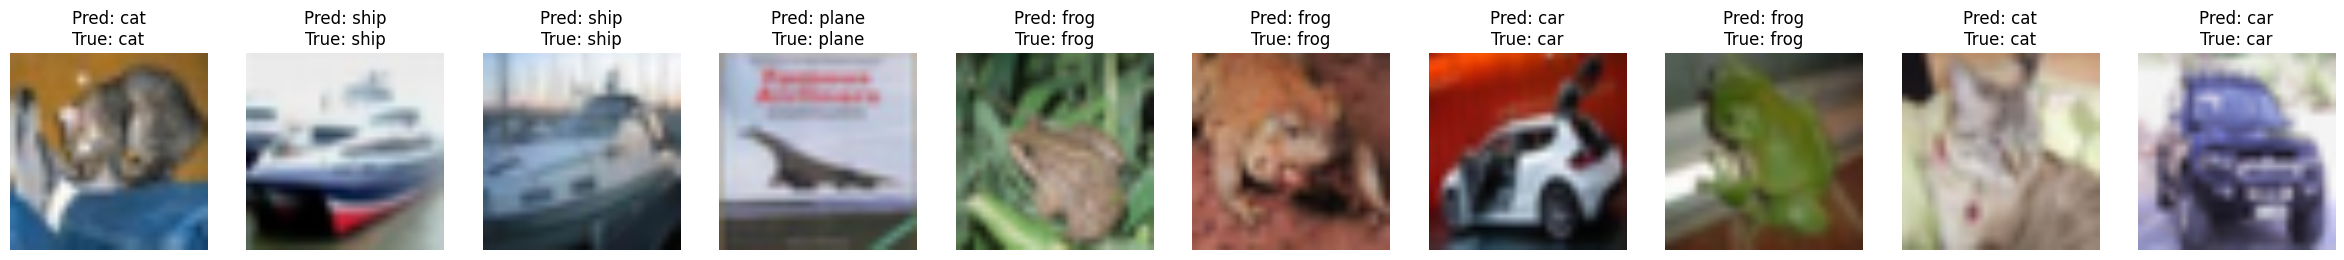

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(images, labels, predicted_labels):
    """Function to display images with labels and predictions"""
    # Set number of images to display
    num_images = len(images)
    fig, axes = plt.subplots(1, num_images, figsize=(num_images * 3, 3))

    for idx in range(num_images):
        ax = axes[idx]
        img = images[idx] / 2 + 0.5  # unnormalize
        npimg = img.numpy()
        ax.imshow(np.transpose(npimg, (1, 2, 0)))
        ax.axis('off')
        # Set title with predicted and true labels
        ax.set_title(f'Pred: {classes[predicted_labels[idx]]}\nTrue: {classes[labels[idx]]}')

# Load a batch of images
dataiter = iter(testloader)
images, labels = next(dataiter)

# Predict labels
predicted_outputs = net_no_freeze(images.to(device))
_, predicted = torch.max(predicted_outputs, 1)

# Show images with annotations
imshow(images[:10], labels[:10], predicted[:10])
plt.show()

Predicted:  cat   ship  ship  plane frog 
True:       cat   ship  ship  plane frog 


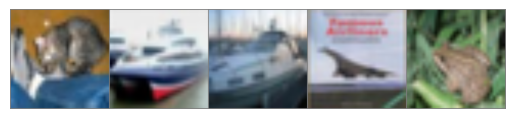

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')

# Get some random test images
dataiter = iter(testloader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images[:5]))
# Print labels
predicted_outputs = net_no_freeze(images.to(device))
_, predicted = torch.max(predicted_outputs, 1)
print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(5)))
print('True:      ', ' '.join(f'{classes[labels[j]]:5s}'
                              for j in range(5)))

plt.show()